#Keywords control with Top-p

Adapted from Pascual et al. (2020). Code available on https://github.com/dapascual/DirectedBeamSearch

##install libraries

In [ ]:
!pip install transformers fasttext bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 7.9 MB/s eta 0:00:00
  Using cached pybind11-2.11.1-py3-none-any.whl (227 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 19.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 12.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 12.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached Cython-0.29.36-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 56.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 8.1 MB/s eta 0:00:00
  C

In [ ]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.de.300.vec.gz

--2023-12-18 17:06:45--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.de.300.vec.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.227.219.70, 13.227.219.59, 13.227.219.33, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.227.219.70|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1278030050 (1.2G) [binary/octet-stream]
Saving to: ‘cc.de.300.vec.gz’

cc.de.300.vec.gz    100%[===================>]   1.19G   125MB/s    in 11s     

2023-12-18 17:06:57 (107 MB/s) - ‘cc.de.300.vec.gz’ saved [1278030050/1278030050]



In [ ]:
%%bash
mkdir treetagger
cd treetagger
# Download the tagger package for your system (PC-Linux, Mac OS-X, ARM64, ARMHF, ARM-Android, PPC64le-Linux).
wget https://cis.lmu.de/~schmid/tools/TreeTagger/data/tree-tagger-linux-3.2.4.tar.gz
tar -xzvf tree-tagger-linux-3.2.4.tar.gz
# Download the tagging scripts into the same directory.
wget https://cis.lmu.de/~schmid/tools/TreeTagger/data/tagger-scripts.tar.gz
gunzip tagger-scripts.tar.gz
# Download the installation script install-tagger.sh.
wget https://cis.lmu.de/~schmid/tools/TreeTagger/data/install-tagger.sh
# Download the parameter files for the languages you want to process.
# list of all files (parameter files) https://cis.lmu.de/~schmid/tools/TreeTagger/#parfiles
wget https://www.cis.uni-muenchen.de/~schmid/tools/TreeTagger/data/german.par.gz
sh install-tagger.sh
cd ..
sudo pip install treetaggerwrapper


bin/
bin/train-tree-tagger
bin/separate-punctuation
bin/tree-tagger
bin/tree-tagger-flush
cmd/
cmd/lookup.perl
COPYRIGHT
doc/
doc/sigdat95.pdf
doc/nemlap94.pdf
FILES
README
Release-Notes

German parameter file installed.
Tagging scripts installed.
Path variables modified in tagging scripts.

You might want to add /content/treetagger/cmd and /content/treetagger/bin to the PATH variable so that you do not need to specify the full path to run the tagging scripts.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for treetaggerwrapper: filename=treetaggerwrapper-2.3-py3-none-any.whl size=40760 sha256=64e2015bab5fde7cbab25efa967e6d075357fb718f2ef60b279c12970aadeed6
  Stored in directory: /root/.cache/pip/wheels/ea/d5/4b/a29ceaa48c687208c69a791394c02c8e432971a98d8e5fc9ca
Successfully built treetaggerwrapper


--2023-12-18 17:06:57--  https://cis.lmu.de/~schmid/tools/TreeTagger/data/tree-tagger-linux-3.2.4.tar.gz
Resolving cis.lmu.de (cis.lmu.de)... 129.187.148.72, 2001:4ca0:4f01::5
Connecting to cis.lmu.de (cis.lmu.de)|129.187.148.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1889240 (1.8M) [application/x-gzip]
Saving to: ‘tree-tagger-linux-3.2.4.tar.gz’

     0K .......... .......... .......... .......... ..........  2% 1.24M 1s
    50K .......... .......... .......... .......... ..........  5% 2.53M 1s
   100K .......... .......... .......... .......... ..........  8% 74.0M 1s
   150K .......... .......... .......... .......... .......... 10%  115M 0s
   200K .......... .......... .......... .......... .......... 13% 2.58M 1s
   250K .......... .......... .......... .......... .......... 16%  118M 0s
   300K .......... .......... .......... .......... .......... 18%  125M 0s
   350K .......... .......... .......... .......... .......... 21% 98.8M 0s
   400K 

In [ ]:
import csv
import math
import random
import torch
import time
import  os
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
import transformers
from transformers import AutoTokenizer, pipeline,AutoModelWithLMHead
from google.colab import drive
import fasttext
from nltk.stem import PorterStemmer
from sklearn.metrics.pairwise import cosine_similarity
import torch.nn.functional as F
from huggingface_hub import hf_hub_download
import treetaggerwrapper
import pandas as pd
import re
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import roc_curve,accuracy_score, recall_score, precision_score,f1_score
import matplotlib.pyplot as plt
from bertopic import BERTopic
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('punkt')
german_stop_words = set(stopwords.words('german'))

tagger = treetaggerwrapper.TreeTagger(TAGLANG='de',TAGDIR='treetagger/')
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/treetaggerwrapper.py:739: FutureWarning: Possible nested set at position 8
  punct2find_re = re.compile("([^ ])([[" + ALONEMARKS + "])",
/usr/local/lib/python3.10/dist-packages/treetaggerwrapper.py:2043: FutureWarning: Possible nested set at position 152
  DnsHostMatch_re = re.compile("(" + DnsHost_expression + ")",
/usr/local/lib/python3.10/dist-packages/treetaggerwrapper.py:2067: FutureWarning: Possible nested set at position 409
  UrlMatch_re = re.compile(UrlMatch_expression, re.VERBOSE | re.IGNORECASE)
/usr/local/lib/python3.10/dist-packages/treetaggerwrapper.py:2079: FutureWarning: Possible nested set at position 192
  EmailMatch_re = re.compile(EmailMatch_expression, re.VERBOSE | re.IGNORECASE)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Mounted at /content/drive


##Prepare functions
### convert sentiment

In [ ]:
def convert_sentiment(text):
  if text in["[negative]","NEGATIVE"]:
    return 0
  if text in ["[positive]","POSITIVE"]:
    return 1


def convert_to_sentiment(x):
  if x == 0:
    return "[negative]"
  if x==1:
    return "[positive]"

In [ ]:
def del_stop_words(text):
  words = nltk.word_tokenize(text)
  filtered_words = [word for word in words if word.lower() not in german_stop_words]
  return' '.join(filtered_words)

### Load FastText and models

In [ ]:
model_path = hf_hub_download(repo_id="facebook/fasttext-de-vectors", filename="model.bin")
model_fasttext = fasttext.load_model(model_path)
#model_fasttext.words

model.bin:   0%|          | 0.00/7.24G [00:00<?, ?B/s]

In [ ]:
tokenizer_for_perplex = AutoTokenizer.from_pretrained("distilbert-base-german-cased")
model_for_perplex = AutoModelWithLMHead.from_pretrained("distilbert-base-german-cased")
#model_for_perplex.to('cuda')

tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/464 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/240k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/479k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/270M [00:00<?, ?B/s]

In [ ]:
#tokenizer_gpt = AutoTokenizer.from_pretrained("/content/drive/MyDrive/Masterthesis/Models/german_gpt2_sft_2_epoch_rl_2epochs")
#model_gpt = AutoModelWithLMHead.from_pretrained("/content/drive/MyDrive/Masterthesis/Models/german_gpt2_sft_2_epoch_rl_2epochs")
tokenizer_gpt = AutoTokenizer.from_pretrained("benjamin/gpt2-wechsel-german")
model_gpt = AutoModelWithLMHead.from_pretrained("benjamin/gpt2-wechsel-german")

tokenizer_config.json:   0%|          | 0.00/250 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/856k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/514k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.47M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/90.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/947 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/665M [00:00<?, ?B/s]

In [ ]:
def top_p_filtering(logits, top_p=0.0, filter_value=-float('Inf')):

    if top_p > 0.0:
        sorted_logits, sorted_indices = torch.sort(logits, descending=True)
        cumulative_probs = torch.cumsum(F.softmax(sorted_logits, dim=-1), dim=-1)

        # Remove tokens with cumulative probability above the threshold
        sorted_indices_to_remove = cumulative_probs > top_p
        # Shift the indices to the right to keep also the first token above the threshold
        sorted_indices_to_remove[..., 1:] = sorted_indices_to_remove[..., :-1].clone()
        sorted_indices_to_remove[..., 0] = 0

        #indices_to_remove = torch.zeros_like(logits, dtype=torch.uint8).scatter_(dim=-1, index=sorted_indices, src=sorted_indices_to_remove )

        indices_to_remove = sorted_indices[sorted_indices_to_remove]
        logits[indices_to_remove] = filter_value

    return logits


## Generete vocabulary table

In [ ]:
vocab_size=len(tokenizer_gpt)
vocab_size

50257

In [ ]:
conv_table_gpt_vocab = np.zeros((vocab_size, 300))
for i in range(vocab_size):
        try:
            word = tokenizer_gpt.decode([i])
            word = word.strip().lower()
            fasttext = model_fasttext.get_word_vector(word)
            conv_table_gpt_vocab[i, :] = fasttext
        except:
            word = tokenizer_gpt.decode([i])
            conv_table_gpt_vocab[i, :] = np.zeros((300))

## Generetes text based on keyowrds list

In [ ]:
def noguide(text, tokenizer, model, top_k=0, top_p=0.9, temperature=1.):
    """ Samples the next word of the sequence without logit modification (guidance
    """
    ## GPT2 - generate logits
    indexed_tokens = tokenizer.encode(text)
    tokens_tensor = torch.tensor([indexed_tokens])
    tokens_tensor = tokens_tensor.to('cuda')
    #model.to('cuda')

    # Predict all tokens
    outputs = model(tokens_tensor)
    del tokens_tensor
    torch.cuda.empty_cache()

    logits = outputs.logits
    logits = logits[0, -1, :]/ temperature
    proba = F.softmax(logits, dim=-1)
    logits = top_p_filtering(logits, top_p=top_p)
    #print("Max logits after sampling: ", logits.shape, torch.max(logits))

    logits = F.softmax(logits, dim=-1)
    predicted_index = torch.multinomial(logits, 1).item()

    predicted_text = tokenizer.decode(indexed_tokens + [predicted_index])
    pred_word = predicted_text.split()[-1]

    return predicted_text

In [ ]:
def guidance(text, tokenizer, model, guide_word_lemma, fasttext_words, conv_table_gpt_vocab, weight, guide=False, top_k=None, top_p=None, temperature=1.):
    """ Samples the next word of the sequence with logit modification (guidance)
    """
    ## GPT2 - generate logits

    indexed_tokens = tokenizer.encode(text)
    tokens_tensor = torch.tensor([indexed_tokens])
    tokens_tensor = tokens_tensor.to('cuda')
    model.to('cuda')


    outputs = model(tokens_tensor)
    del tokens_tensor
    torch.cuda.empty_cache()

    logits = outputs.logits
    logits = logits[0, -1, :]/ temperature
    proba = F.softmax(logits, dim=-1)

    # Calculate cosine similarity
    logits_pro_guid_word=[]
    pred_indexes=[]
    for k,fasttext_word in zip(guide_word_lemma,fasttext_words):
      sim = cosine_similarity(np.reshape(
              fasttext_word, (1, -1)), conv_table_gpt_vocab)

      sim = np.clip(np.squeeze(sim), a_min=0, a_max=None)
      sim_squared = sim*sim     ###

      logits_temp = logits + torch.tensor(sim_squared*weight).cuda()

      logits_temp = top_p_filtering(logits_temp,  top_p=top_p)

      logits_temp = F.softmax(logits_temp, dim=-1)

      predicted_index = torch.multinomial(logits_temp, 1).item() #sample from multinomial distribution

      logits_pro_guid_word.append(logits[predicted_index].item())

      pred_indexes.append(predicted_index)

    predicted_index=pred_indexes[np.argmax(logits_pro_guid_word)]
    predicted_text = tokenizer.decode(indexed_tokens + [predicted_index])
    pred_word = predicted_text.split()[-1]

    pred_word_lemma=  tagger.tag_text(pred_word,tagonly=True)
    pred_word_lemma=[keyword.split('\t')[-1] for keyword in pred_word_lemma][0]
    #pred_word_stem = porter.stem(pred_word)

    if pred_word_lemma in guide_word_lemma:

        fasttext_words.pop(guide_word_lemma.index(pred_word_lemma))
        guide_word_lemma.remove(pred_word_lemma)

        if  guide_word_lemma==[]:
          guide = False
          print("false")

    return predicted_text, guide, guide_word_lemma,fasttext_words

In [ ]:

temperature=0.9
top_k=0
top_p=0.5
models_dir='models'
number_of_words_per_sentence = 100

sample=False
temp=1
only_max = False


In [ ]:
df_keywords=pd.read_csv("/content/drive/MyDrive/Masterthesis/Data/keywords_list.tsv")

In [ ]:
df_top_p=pd.DataFrame(columns=["sentiment","text","gen_text","perplexity", "keywords", "num_keywords", "num_keywords_not_used"])
tagger = treetaggerwrapper.TreeTagger(TAGLANG='de',TAGDIR='treetagger/')
random.seed(10)
sentiment=False
for i in range(0,50):
  keywords=eval(df_keywords.loc[i,"keywords" ])#random.sample(words,3)
  keywords = tagger.tag_text(keywords,tagonly=True)
  keywords=[keyword.split('\t')[-1] for keyword in keywords]
  keywords_fasttext=[model_fasttext.get_word_vector(keyword) for keyword in keywords]

  proba = 1
  this_sequence = ""
  if  sentiment==True:
      context=  df_keywords.loc[i,"sent" ]+ " Wir waren in diesem Hotel."#random.sample(sentiment,1)[0]
  else:
      context= " Wir waren in diesem Hotel."#random.sample(sentiment,1)[0]

  #guidance_word = keywords[0]
  weight=30
  context_cp=context
  guide_next = True
  current_keyword=0
  lenght_keywords=len(keywords)
  guide_next = True
  current_keyword=0
  lenght_keywords=len(keywords)
  guide_word_lemma= tagger.tag_text(keywords,tagonly=True)
  guide_word_lemma=[keyword.split('\t')[-1] for keyword in guide_word_lemma]
  guide_word_lemma_cp=guide_word_lemma.copy()
  keywords_fasttext_cp=keywords_fasttext.copy()
  proba = 1
  for j in range(number_of_words_per_sentence):
    if guide_next == True:
        context, guide_next, guide_word_lemma,keywords_fasttext= guidance(context,tokenizer_gpt, model_gpt,
                                    guide_word_lemma,keywords_fasttext, conv_table_gpt_vocab, weight, guide_next, proba,top_p=top_p)


    else:
        context = noguide(context, tokenizer_gpt, model_gpt,top_p=top_p)


  generated_text=re.sub('\[.*?\]', '', context)
  tokenize_input = tokenizer_for_perplex.tokenize(generated_text)
  tensor_input = torch.tensor([tokenizer_for_perplex.convert_tokens_to_ids(tokenize_input)])
  loss, logits = model_for_perplex(tensor_input, labels=tensor_input)[:2]
  df_top_p.loc[i,"sentiment"]=df_keywords.loc[i,"sent" ]
  df_top_p.loc[i,"text"]=context
  df_top_p.loc[i,"gen_text"]=generated_text
  df_top_p.loc[i,"perplexity"]=math.exp(loss)
  df_top_p.loc[i,"keywords"]=guide_word_lemma_cp
  df_top_p.loc[i, "num_keywords"]=len(guide_word_lemma_cp)
  df_top_p.loc[i, "num_keywords_not_used"]=len(guide_word_lemma)


In [ ]:
#df_top_p.to_csv('/content/drive/MyDrive/Masterthesis/Results/top_p_22.tsv', sep="\t")
df_top_p.to_csv('/content/drive/MyDrive/Masterthesis/Results/top_p_gpt_without_sentiment.tsv', sep="\t")

##sft 1 rl 1

In [ ]:
df_top_p11=pd.read_csv('/content/drive/MyDrive/Masterthesis/Results/top_p_11.tsv', sep="\t")

In [ ]:
df_top_p11.groupby("sentiment").mean()["perplexity"]

sentiment
[negative]    1.088627
[positive]    1.118181
Name: perplexity, dtype: float64

In [ ]:
df_top_p11["perplexity"].mean()

1.1010396728647

In [ ]:
df_top_p11["num_keywords_used"]=df_top_p11["num_keywords"]-df_top_p11["num_keywords_not_used"]


In [ ]:
df_top_p11.groupby("num_keywords_used").mean()["perplexity"]

num_keywords_used
0    1.069114
1    1.068165
2    1.309000
3    1.099473
Name: perplexity, dtype: float64

In [ ]:
df_top_p11["succses_rate"]=df_top_p11["num_keywords_used"]/df_top_p11["num_keywords"]
np.mean(df_top_p11["succses_rate"])

0.6466666666666667

In [ ]:
sentiment_pipe_kwargs = {"top_k": None, "function_to_apply": "none"}
classifier = pipeline("sentiment-analysis", model="/content/drive/MyDrive/Masterthesis/Models/sentiment_discriminator_bert_finetuned",**sentiment_pipe_kwargs)
df_top_p11["sent_predicted_label"]=df_top_p11["gen_text"].apply(lambda x:classifier(x)[0][0]["label"] )
df_top_p11["sentiment_conv"]=df_top_p11["sentiment"].apply(lambda x :convert_sentiment(x))
df_top_p11["sent_predicted_label_conv"]=df_top_p11["sent_predicted_label"].apply(lambda x :convert_sentiment(x))

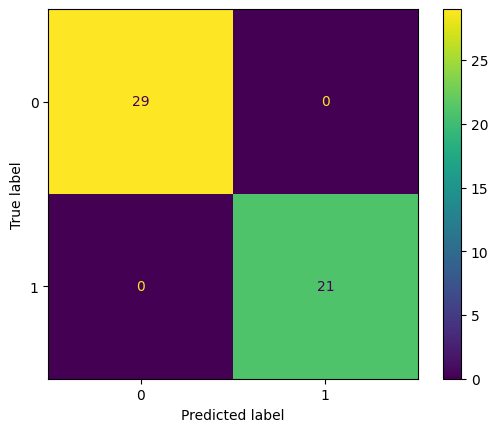

Accuracy: 1.0
Recall: [1. 1.]
Precision: [1. 1.]
F1: [1. 1.]


In [ ]:
y_test=df_top_p11["sentiment_conv"]
predicted=df_top_p11["sent_predicted_label_conv"]

cm=confusion_matrix(y_test, predicted)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)#, display_labels = ["negative[0]", "Positive[1]"])

cm_display.plot()
plt.show()

accuracy = accuracy_score(y_test, predicted)
print("Accuracy:", accuracy)

# Calculate recall
recall = recall_score(y_test, predicted,average=None)
print("Recall:", recall)

# Calculate precision
precision = precision_score(y_test, predicted,average=None)
print("Precision:", precision)

f1 = f1_score(y_test, predicted,average=None)
print("F1:", f1)

In [ ]:
df_top_p11['text_del_stop_words']=df_top_p11['gen_text'].apply(del_stop_words)
docs = df_top_p11['text_del_stop_words']
topic_model = BERTopic(language="multilingual")
topics, probs = topic_model.fit_transform(docs)
topic_model.visualize_hierarchy()

(…)4f28fa5e092e665fc6f7c49cd/.gitattributes:   0%|          | 0.00/968 [00:00<?, ?B/s]

(…)e092e665fc6f7c49cd/1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

(…)9bcf24f28fa5e092e665fc6f7c49cd/README.md:   0%|          | 0.00/4.09k [00:00<?, ?B/s]

(…)cf24f28fa5e092e665fc6f7c49cd/config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

(…)7c49cd/config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/471M [00:00<?, ?B/s]

(…)e665fc6f7c49cd/sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

(…)92e665fc6f7c49cd/special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

(…)e092e665fc6f7c49cd/tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

unigram.json:   0%|          | 0.00/14.8M [00:00<?, ?B/s]

(…)f24f28fa5e092e665fc6f7c49cd/modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

In [ ]:
topic_model.get_topics()

{0: [('schlecht', 0.15597962230127216),
  ('essen', 0.12293453284299624),
  ('gab', 0.12131748401210059),
  ('ungenießbar', 0.10988750700125409),
  ('hotel', 0.10294260848820942),
  ('zimmer', 0.09702534501134506),
  ('gewechselt', 0.09487491355931926),
  ('klein', 0.07401289553142447),
  ('unfreundlich', 0.07305952138604511),
  ('zimmerreinigung', 0.07107053690125938)],
 1: [('gut', 0.17067418042190546),
  ('zimmer', 0.1630033524214891),
  ('freundlich', 0.14803279953406281),
  ('personal', 0.14135532180324187),
  ('hilfsbereit', 0.1359789725379345),
  ('sauber', 0.1336339314248399),
  ('hotel', 0.12011020904705846),
  ('groß', 0.11161325941012995),
  ('immer', 0.09813547756586208),
  ('tag', 0.07456058744188017)]}

In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,0,27,0_schlecht_essen_gab_ungenießbar,"[schlecht, essen, gab, ungenießbar, hotel, zim...",[Hotel . Essen ungenießbar . gab Sorte Wurst S...
1,1,23,1_gut_zimmer_freundlich_personal,"[gut, zimmer, freundlich, personal, hilfsberei...",[Hotel . Personal freundlich hilfsbereit . Hil...


In [ ]:
topic_model.visualize_heatmap()

In [ ]:
topic_model.visualize_barchart()

## sft 1 rl 2

In [ ]:
df_top_p12=pd.read_csv('/content/drive/MyDrive/Masterthesis/Results/top_p_12.tsv', sep="\t")

In [ ]:
df_top_p12=df_top_p12[ ~df_top_p12.index.isin([30,45])]

In [ ]:
df_top_p12["num_keywords_used"]=df_top_p12["num_keywords"]-df_top_p12["num_keywords_not_used"]

In [ ]:
df_top_p12["perplexity"].mean()

1.0897705443530412

In [ ]:
df_top_p12.groupby("num_keywords_used").mean()["perplexity"]

num_keywords_used
0    1.079399
1    1.059265
2    1.254366
3    1.093087
Name: perplexity, dtype: float64

In [ ]:
df_top_p12["succses_rate"]=df_top_p12["num_keywords_used"]/df_top_p12["num_keywords"]
np.mean(df_top_p12["succses_rate"])

0.6180555555555557

In [ ]:
sentiment_pipe_kwargs = {"top_k": None, "function_to_apply": "none"}
classifier = pipeline("sentiment-analysis", model="/content/drive/MyDrive/Masterthesis/Models/sentiment_discriminator_bert_finetuned",**sentiment_pipe_kwargs)
df_top_p12["sent_predicted_label"]=df_top_p12["gen_text"].apply(lambda x:classifier(x)[0][0]["label"] )
df_top_p12["sentiment_conv"]=df_top_p12["sentiment"].apply(lambda x :convert_sentiment(x))
df_top_p12["sent_predicted_label_conv"]=df_top_p12["sent_predicted_label"].apply(lambda x :convert_sentiment(x))

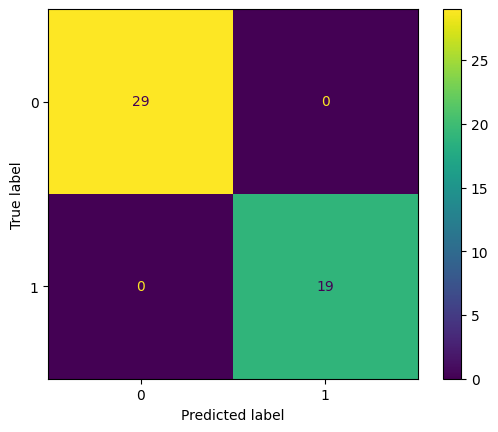

Accuracy: 1.0
Recall: [1. 1.]
Precision: [1. 1.]
F1: [1. 1.]


In [ ]:
y_test=df_top_p12["sentiment_conv"]
predicted=df_top_p12["sent_predicted_label_conv"]

cm=confusion_matrix(y_test, predicted)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)#, display_labels = ["negative[0]", "Positive[1]"])

cm_display.plot()
plt.show()

accuracy = accuracy_score(y_test, predicted)
print("Accuracy:", accuracy)

# Calculate recall
recall = recall_score(y_test, predicted,average=None)
print("Recall:", recall)

# Calculate precision
precision = precision_score(y_test, predicted,average=None)
print("Precision:", precision)

f1 = f1_score(y_test, predicted,average=None)
print("F1:", f1)

In [ ]:
df_top_p12['text_del_stop_words']=df_top_p12['text'].apply(del_stop_words)
docs = df_top_p12['text_del_stop_words']
topic_model = BERTopic(language="multilingual")
topics, probs = topic_model.fit_transform(docs)
topic_model.visualize_hierarchy()

In [ ]:
topic_model.get_topics()

{-1: [('poolbereich', 0.7434232843912502),
  ('pool', 0.366837995119232),
  ('poolrestaurants', 0.3552579873675603),
  ('poolbar', 0.3431184389498078),
  ('laut', 0.33671834415219387),
  ('sauber', 0.29995338963834584),
  ('schmutzig', 0.18750358611198503),
  ('klein', 0.11668065601909486),
  ('hotel', 0.09631147211327509),
  ('überfüllt', 0.09462568409981549)],
 0: [('schlecht', 0.1212528750927893),
  ('hotel', 0.09893021304686866),
  ('essen', 0.09430779173883613),
  ('zimmer', 0.0893433318499425),
  ('negative', 0.08459493749244368),
  ('gab', 0.07695386629455696),
  ('kaffee', 0.07481010876174506),
  ('gut', 0.07109646267423679),
  ('katastrophe', 0.06986618388994904),
  ('richtig', 0.0673244905109067)],
 1: [('pool', 0.21875307382193454),
  ('wasserkocher', 0.18068699853470832),
  ('zimmer', 0.14969937055360136),
  ('sauber', 0.13395687933786843),
  ('gut', 0.13255001208275533),
  ('schön', 0.11064010932796832),
  ('hotel', 0.08385980306269471),
  ('gepflegt', 0.08284165932754692)

In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,2,-1_poolbereich_pool_poolrestaurants_poolbar,"[poolbereich, pool, poolrestaurants, poolbar, ...",[[ negative ] Hotel . Hotel heruntergekommen ....
1,0,27,0_schlecht_hotel_essen_zimmer,"[schlecht, hotel, essen, zimmer, negative, gab...",[[ negative ] Hotel . Essen einfach schlecht ....
2,1,19,1_pool_wasserkocher_zimmer_sauber,"[pool, wasserkocher, zimmer, sauber, gut, schö...",[[ positive ] Hotel . Hotel sauber Personal fr...


In [ ]:
topic_model.visualize_heatmap()

## sft 2 rl 1

In [ ]:
df_top_p21=pd.read_csv('/content/drive/MyDrive/Masterthesis/Results/top_p_21.tsv', sep="\t")

In [ ]:
df_top_p21.sort_values(by=["perplexity"],ascending=False).head(2)
df_top_p21=df_top_p21[~df_top_p21.index.isin([26,30])]

In [ ]:
df_top_p21["perplexity"].mean()

1.1168278214273988

In [ ]:
df_top_p21["num_keywords_used"]=df_top_p21["num_keywords"]-df_top_p21["num_keywords_not_used"]

In [ ]:
df_top_p21.groupby("num_keywords_used").mean()["perplexity"]

num_keywords_used
0    1.091799
1    1.241230
2    1.081666
3    1.107811
Name: perplexity, dtype: float64

In [ ]:
df_top_p21["succses_rate"]=df_top_p21["num_keywords_used"]/df_top_p21["num_keywords"]
np.mean(df_top_p12["succses_rate"])

0.6180555555555557

In [ ]:
sentiment_pipe_kwargs = {"top_k": None, "function_to_apply": "none"}
classifier = pipeline("sentiment-analysis", model="/content/drive/MyDrive/Masterthesis/Models/sentiment_discriminator_bert_finetuned",**sentiment_pipe_kwargs)
df_top_p21["sent_predicted_label"]=df_top_p21["gen_text"].apply(lambda x:classifier(x)[0][0]["label"] )
df_top_p21["sentiment_conv"]=df_top_p21["sentiment"].apply(lambda x :convert_sentiment(x))
df_top_p21["sent_predicted_label_conv"]=df_top_p21["sent_predicted_label"].apply(lambda x :convert_sentiment(x))

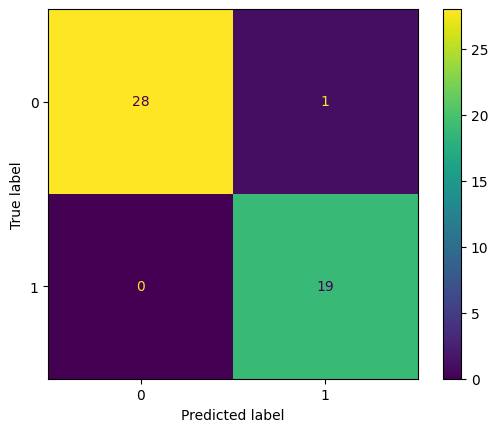

Accuracy: 0.9791666666666666
Recall: [0.96551724 1.        ]
Precision: [1.   0.95]
F1: [0.98245614 0.97435897]


In [ ]:
y_test=df_top_p21["sentiment_conv"]
predicted=df_top_p21["sent_predicted_label_conv"]

cm=confusion_matrix(y_test, predicted)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)#, display_labels = ["negative[0]", "Positive[1]"])

cm_display.plot()
plt.show()

accuracy = accuracy_score(y_test, predicted)
print("Accuracy:", accuracy)

# Calculate recall
recall = recall_score(y_test, predicted,average=None)
print("Recall:", recall)

# Calculate precision
precision = precision_score(y_test, predicted,average=None)
print("Precision:", precision)

f1 = f1_score(y_test, predicted,average=None)
print("F1:", f1)

In [ ]:
df_top_p21['text_del_stop_words']=df_top_p21['text'].apply(del_stop_words)
docs = df_top_p21['text_del_stop_words']
topic_model = BERTopic(language="multilingual")
topics, probs = topic_model.fit_transform(docs)
#topic_model.visualize_hierarchy()

In [ ]:
topic_model.get_topics()

{-1: [('frühstück', 0.40114473101231723),
  ('abendessen', 0.35676872526816367),
  ('gut', 0.2997995808720835),
  ('gleiche', 0.19466398100544402),
  ('gab', 0.19443587738437632),
  ('essen', 0.18302283415699575),
  ('immer', 0.10815827997866061),
  ('zwei', 0.1040480085815539),
  ('tag', 0.09332264891805056),
  ('negative', 0.07640852019282235)],
 0: [('dreckig', 0.1361909344569739),
  ('gab', 0.11664385311954706),
  ('schlecht', 0.10866280531112409),
  ('essen', 0.10407846746202436),
  ('gewechselt', 0.09378895199088816),
  ('hotel', 0.08493034634612881),
  ('unfreundlich', 0.08288312584138403),
  ('gleiche', 0.08050790306693868),
  ('negative', 0.08021679214304785),
  ('handtücher', 0.07486429658109027)],
 1: [('zimmer', 0.15433370921473683),
  ('sauber', 0.12300973679158703),
  ('täglich', 0.12143400879578259),
  ('wurden', 0.1149741589909096),
  ('immer', 0.10319182834698742),
  ('gereinigt', 0.09524832855133662),
  ('begleichenrechnung', 0.09524832855133662),
  ('hotel', 0.084127

In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,4,-1_frühstück_abendessen_gut_gleiche,"[frühstück, abendessen, gut, gleiche, gab, ess...",[[ negative ] Hotel . Essen gut . Tag gleiche ...
1,0,24,0_dreckig_gab_schlecht_essen,"[dreckig, gab, schlecht, essen, gewechselt, ho...",[[ negative ] Hotel . Frühstück schlecht . Kli...
2,1,20,1_zimmer_sauber_täglich_wurden,"[zimmer, sauber, täglich, wurden, immer, gerei...",[[ positive ] Hotel . Personal freundlich hilf...


In [ ]:
topic_model.visualize_heatmap()

## sft 2 rl 2

In [ ]:
df_top_p22=pd.read_csv('/content/drive/MyDrive/Masterthesis/Results/top_p_22.tsv', sep="\t")

In [ ]:
df_top_p22["perplexity"].mean()

1.0938314930742596

In [ ]:
df_top_p22["num_keywords_used"]=df_top_p22["num_keywords"]-df_top_p22["num_keywords_not_used"]

In [ ]:
df_top_p22.groupby("num_keywords_used").mean()["perplexity"]

num_keywords_used
0    1.083632
1    1.115714
3    1.096792
Name: perplexity, dtype: float64

In [ ]:
df_top_p22["succses_rate"]=df_top_p22["num_keywords_used"]/df_top_p22["num_keywords"]
np.mean(df_top_p22["succses_rate"])

0.6066666666666666

In [ ]:
df_top_p22["gen_text"]=df_top_p22["text"].apply(lambda x: re.sub(r'\[.*?\]', '', x))

In [ ]:
sentiment_pipe_kwargs = {"top_k": None, "function_to_apply": "none"}
classifier = pipeline("sentiment-analysis", model="/content/drive/MyDrive/Masterthesis/Models/sentiment_discriminator_bert_finetuned",**sentiment_pipe_kwargs)
df_top_p22["sent_predicted_label"]=df_top_p22["gen_text"].apply(lambda x:classifier(x)[0][0]["label"] )
df_top_p22["sentiment_conv"]=df_top_p22["sentiment"].apply(lambda x :convert_sentiment(x))
df_top_p22["sent_predicted_label_conv"]=df_top_p22["sent_predicted_label"].apply(lambda x :convert_sentiment(x))

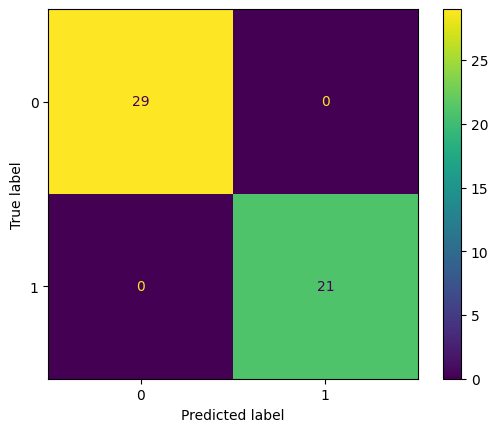

Accuracy: 1.0
Recall: [1. 1.]
Precision: [1. 1.]
F1: [1. 1.]


In [ ]:
y_test=df_top_p22["sentiment_conv"]
predicted=df_top_p22["sent_predicted_label_conv"]

cm=confusion_matrix(y_test, predicted)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)#, display_labels = ["negative[0]", "Positive[1]"])

cm_display.plot()
plt.show()

accuracy = accuracy_score(y_test, predicted)
print("Accuracy:", accuracy)

# Calculate recall
recall = recall_score(y_test, predicted,average=None)
print("Recall:", recall)

# Calculate precision
precision = precision_score(y_test, predicted,average=None)
print("Precision:", precision)

f1 = f1_score(y_test, predicted,average=None)
print("F1:", f1)

In [ ]:
df_top_p22['text_del_stop_words']=df_top_p22['text'].apply(del_stop_words)
docs = df_top_p22['text_del_stop_words']
topic_model = BERTopic(language="multilingual")
topics, probs = topic_model.fit_transform(docs)
topic_model.visualize_hierarchy()

In [ ]:
topic_model.get_topics()

{-1: [('gut', 0.1595648325869398),
  ('sauber', 0.1529471201807773),
  ('animation', 0.12373362404831137),
  ('immer', 0.11111104106170361),
  ('katastrophe', 0.10463423431586494),
  ('zimmer', 0.09612227663741346),
  ('abendessen', 0.08827142760757042),
  ('schön', 0.07425456888595852),
  ('hotel', 0.0711110662794903),
  ('positive', 0.06790109815966956)],
 0: [('essen', 0.13149483391124994),
  ('gab', 0.12188354846787097),
  ('hotel', 0.11241822978007658),
  ('negative', 0.08345933091520961),
  ('schlecht', 0.08261109818861788),
  ('dreckig', 0.07719339345361605),
  ('pool', 0.07158339595711807),
  ('unfreundlich', 0.06868997437871459),
  ('immer', 0.06495275498404425),
  ('zumutung', 0.06464938765055492)],
 1: [('wasserkocher', 0.2800424458396223),
  ('zimmer', 0.1949197770544534),
  ('täglich', 0.1144249956152179),
  ('sauber', 0.10784369806981016),
  ('handtücher', 0.10503385614928293),
  ('ausgestattet', 0.09941061618628041),
  ('immer', 0.09603567368147248),
  ('gut', 0.09318603

In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,13,-1_gut_sauber_animation_immer,"[gut, sauber, animation, immer, katastrophe, z...",[[ positive ] Hotel . Zimmer schön sauber . An...
1,0,24,0_essen_gab_hotel_negative,"[essen, gab, hotel, negative, schlecht, drecki...",[[ negative ] Hotel . Personal total unfreundl...
2,1,13,1_wasserkocher_zimmer_täglich_sauber,"[wasserkocher, zimmer, täglich, sauber, handtü...",[[ positive ] Hotel . Zimmer groß sauber . Aus...


In [ ]:
topic_model.visualize_heatmap()

##GPT with sentiment token

In [ ]:
tdf_top_p_gpt=pd.read_csv('/content/drive/MyDrive/Masterthesis/Results/top_p_gpt.tsv', sep="\t")

In [ ]:
df_top_p_gpt.groupby("sentiment").mean()["perplexity"]

sentiment
[negative]    1.108822
[positive]    3.798489
Name: perplexity, dtype: float64

In [ ]:
df_top_p_gpt["perplexity"].mean()

2.238482166682956

In [ ]:
df_top_p_gpt["num_keywords_used"]=df_top_p11["num_keywords"]-df_top_p11["num_keywords_not_used"]


In [ ]:
df_top_p_gpt.groupby("num_keywords_used").mean()["perplexity"]

num_keywords_used
0     1.073572
1    15.138263
2     1.339721
3     1.114548
Name: perplexity, dtype: float64

In [ ]:
df_top_p_gpt["succses_rate"]=df_top_p_gpt["num_keywords_used"]/df_top_p_gpt["num_keywords"]
np.mean(df_top_p_gpt["succses_rate"])

0.6466666666666667

In [ ]:
df_top_p_gpt["gen_text"]=df_top_p_gpt["text"].apply(lambda x: re.sub(r'\[.*?\]', '', x))

In [ ]:
sentiment_pipe_kwargs = {"top_k": None, "function_to_apply": "none"}
classifier = pipeline("sentiment-analysis", model="/content/drive/MyDrive/Masterthesis/Models/sentiment_discriminator_bert_finetuned",**sentiment_pipe_kwargs)
df_top_p_gpt["sent_predicted_label"]=df_top_p_gpt["gen_text"].apply(lambda x:classifier(x)[0][0]["label"] )
df_top_p_gpt["sentiment_conv"]=df_top_p_gpt["sentiment"].apply(lambda x :convert_sentiment(x))
df_top_p_gpt["sent_predicted_label_conv"]=df_top_p_gpt["sent_predicted_label"].apply(lambda x :convert_sentiment(x))

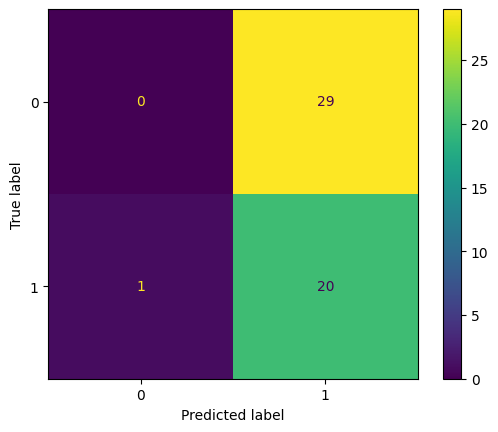

Accuracy: 0.4
Recall: [0.         0.95238095]
Precision: [0.         0.40816327]
F1: [0.         0.57142857]


In [ ]:
y_test=df_top_p_gpt["sentiment_conv"]
predicted=df_top_p_gpt["sent_predicted_label_conv"]

cm=confusion_matrix(y_test, predicted)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)#, display_labels = ["negative[0]", "Positive[1]"])

cm_display.plot()
plt.show()

accuracy = accuracy_score(y_test, predicted)
print("Accuracy:", accuracy)

# Calculate recall
recall = recall_score(y_test, predicted,average=None)
print("Recall:", recall)

# Calculate precision
precision = precision_score(y_test, predicted,average=None)
print("Precision:", precision)

f1 = f1_score(y_test, predicted,average=None)
print("F1:", f1)

In [ ]:
df_top_p_gpt['text_del_stop_words']=df_top_p_gpt['gen_text'].apply(del_stop_words)
docs = df_top_p_gpt['text_del_stop_words']
topic_model = BERTopic(language="multilingual")
topics, probs = topic_model.fit_transform(docs)


In [ ]:
topic_model.get_topics()

{-1: [('hotel', 0.1927969144939331),
  ('gut', 0.18739809923577977),
  ('wasserkocher', 0.15545059579548676),
  ('zimmer', 0.1481073008991061),
  ('sauber', 0.1481073008991061),
  ('frühstück', 0.12341498185834088),
  ('freundlich', 0.11372435504602194),
  ('personal', 0.10997604946618235),
  ('lage', 0.09562876395628296),
  ('hilfsbereit', 0.08875438285187269)]}

In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,50,-1_hotel_gut_wasserkocher_zimmer,"[hotel, gut, wasserkocher, zimmer, sauber, frü...",[Hotel . Hotelanlage schön sauber . Zimmer sau...


##GPT without sentiment token

In [ ]:
df_top_p_gpt=pd.read_csv('/content/drive/MyDrive/Masterthesis/Results/top_p_gpt_without_sentiment.tsv', sep="\t")

In [ ]:
df_top_p_gpt.groupby("sentiment").mean()["perplexity"]

sentiment
[negative]    1.117568
[positive]    1.111305
Name: perplexity, dtype: float64

In [ ]:
df_top_p_gpt["perplexity"].mean()

1.1149375679738798

In [ ]:
df_top_p_gpt["num_keywords_used"]=df_top_p_gpt["num_keywords"]-df_top_p_gpt["num_keywords_not_used"]


In [ ]:
df_top_p_gpt.groupby("num_keywords_used").mean()["perplexity"]

num_keywords_used
0    1.089115
1    1.049180
3    1.123343
Name: perplexity, dtype: float64

In [ ]:
df_top_p_gpt["succses_rate"]=df_top_p_gpt["num_keywords_used"]/df_top_p_gpt["num_keywords"]
np.mean(df_top_p_gpt["succses_rate"])

0.7733333333333333

In [ ]:
df_top_p_gpt["gen_text"]=df_top_p_gpt["text"].apply(lambda x: re.sub(r'\[.*?\]', '', x))

In [ ]:
sentiment_pipe_kwargs = {"top_k": None, "function_to_apply": "none"}
classifier = pipeline("sentiment-analysis", model="/content/drive/MyDrive/Masterthesis/Models/sentiment_discriminator_bert_finetuned",**sentiment_pipe_kwargs)
df_top_p_gpt["sent_predicted_label"]=df_top_p_gpt["gen_text"].apply(lambda x:classifier(x)[0][0]["label"] )
df_top_p_gpt["sentiment_conv"]=df_top_p_gpt["sentiment"].apply(lambda x :convert_sentiment(x))
df_top_p_gpt["sent_predicted_label_conv"]=df_top_p_gpt["sent_predicted_label"].apply(lambda x :convert_sentiment(x))

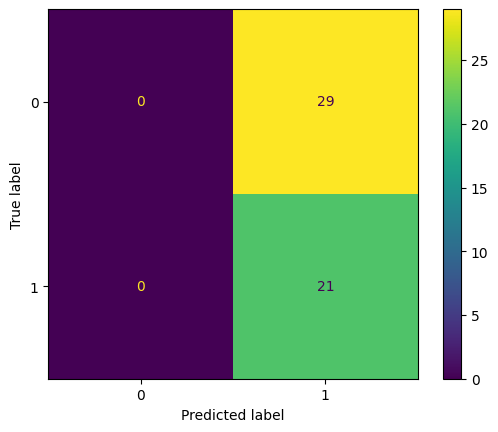

Accuracy: 0.42
Recall: [0. 1.]
Precision: [0.   0.42]
F1: [0.        0.5915493]


In [ ]:
y_test=df_top_p_gpt["sentiment_conv"]
predicted=df_top_p_gpt["sent_predicted_label_conv"]

cm=confusion_matrix(y_test, predicted)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)#, display_labels = ["negative[0]", "Positive[1]"])

cm_display.plot()
plt.show()

accuracy = accuracy_score(y_test, predicted)
print("Accuracy:", accuracy)

# Calculate recall
recall = recall_score(y_test, predicted,average=None)
print("Recall:", recall)

# Calculate precision
precision = precision_score(y_test, predicted,average=None)
print("Precision:", precision)

f1 = f1_score(y_test, predicted,average=None)
print("F1:", f1)

In [ ]:
df_top_p_gpt['text_del_stop_words']=df_top_p_gpt['gen_text'].apply(del_stop_words)
docs = df_top_p_gpt['text_del_stop_words']
topic_model = BERTopic(language="multilingual")
topics, probs = topic_model.fit_transform(docs)


.gitattributes:   0%|          | 0.00/968 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.09k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/471M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

unigram.json:   0%|          | 0.00/14.8M [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

In [ ]:
topic_model.get_topics()

{-1: [('hotel', 0.1930477333587366),
  ('gut', 0.18760468043467832),
  ('zimmer', 0.15222612188617116),
  ('sauber', 0.15010352424300744),
  ('wasserkocher', 0.13919760271180054),
  ('frühstück', 0.12775771819219398),
  ('freundlich', 0.11570825441419781),
  ('personal', 0.10556462741083605),
  ('lage', 0.09352949663150724),
  ('hilfsbereit', 0.09214667881012334)]}

In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,50,-1_hotel_gut_zimmer_sauber,"[hotel, gut, zimmer, sauber, wasserkocher, frü...",[Hotel . Sauberkeit Zimmer sauber geräumig . B...
